### Asymptotic mound shape.

See Krug and Kohn "Second Layer Nucleation and the Shape of Wedding Cakes" (2002).

Some key formulas:

$x = (n - Ft)/\sqrt{FT}$

$\theta_n(t) = \Phi[(n - Ft)/\sqrt{FT}]$

$\DeclareMathOperator\erf{erf}  \Phi(x) = 1-C[1+\erf(x/\sqrt{2})]$

I think the height probability distribution is the same as the terrace lengths as a function of height.  In other words:

$P_n(t) = [\theta_{n-1} - \theta_n(t)]/\theta_0 , n\ge 1$   assuming that $n$ layers are arranged from bottom to top.

$  \sum_{n=1} P_n(t) = 1$   No need to normalize the probability when $\theta_0 = 1$.

The plots below confirm that the height of the propability bars are equivalent to taking the terrace lengths and turning them vertically.  This is simple because the longest terraces also represent the most probably heights. One should be able to see the correspondence visually when comparing the height probability distribution to the mound shape plot.

In [1]:
import numpy as np
from scipy import special
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
F = 0.005 
t = 2000  # 5 layers if F=0.005
n = np.linspace(0,210,211)
x = (n - F*t)/np.sqrt(F*t)
C = 0.8

In [3]:
def xn(n,t,F): return (n - F*t)/np.sqrt(F*t)

In [4]:
def theta(x): return 1-C*(1+special.erf(x/np.sqrt(2)))

In [5]:
def prob(n,t,F): return theta(xn(n-1,t,F))-theta(xn(n,t,F))

In [6]:
# theta(xn(n,t,F))

In [7]:
# prob(n,t,F)

<IPython.core.display.Javascript object>


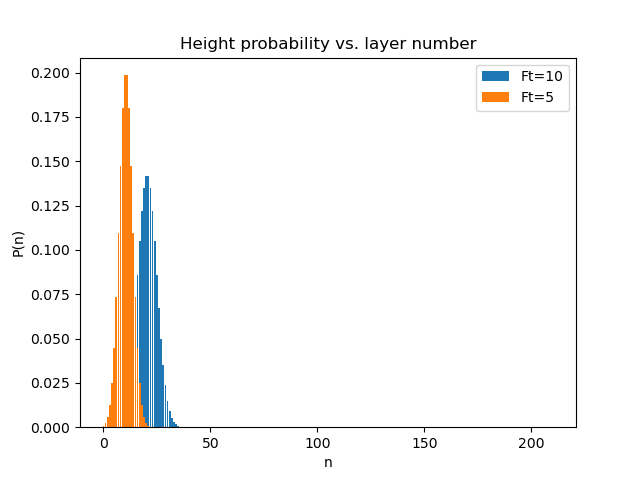

In [8]:
# check height probability distribution.
plt.figure(1)
plt.bar(n,prob(n,2*t,F),label="Ft=10")
plt.bar(n,prob(n,t,F),label="Ft=5")
plt.xlabel('n')
plt.ylabel("P(n)")
plt.title("Height probability vs. layer number")
plt.legend()

In [9]:
F = 0.005 
t = 1500  # 5 layers if F=0.005
n = np.linspace(0,210,211)
x = (n - F*t)/np.sqrt(F*t)
C = 0.5

<IPython.core.display.Javascript object>


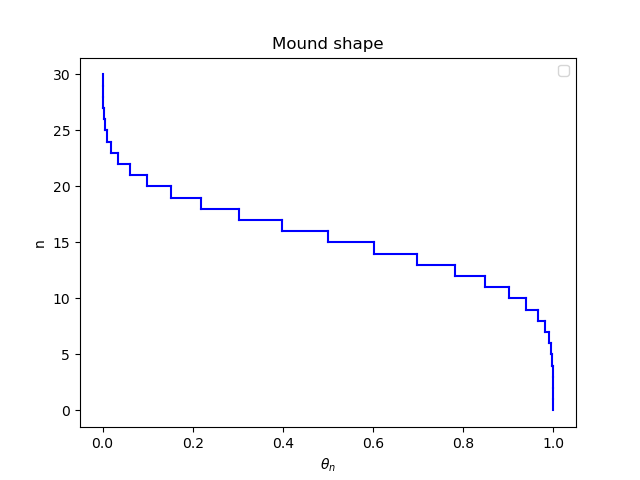

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [10]:
plt.figure(2)
# for ind in range(10):
#     #print(ind, theta(xn(ind,t,F)))
#     plt.plot([theta(xn(ind,t,F)),theta(xn(ind+1,t,F))],[ind+1,ind+1],'--',color='orange')
#     plt.plot([theta(xn(ind,t,F)),theta(xn(ind,t,F))],[ind,ind+1],'--',color='orange')
# plt.plot([theta(xn(ind,t,F)),0],[ind+1,ind+1],'--',color='orange',label="FT=5")
    
for ind in range(30):
    plt.plot([theta(xn(ind,2*t,F)),theta(xn(ind+1,2*t,F))],[ind+1,ind+1],color='blue')
    plt.plot([theta(xn(ind,2*t,F)),theta(xn(ind,2*t,F))],[ind,ind+1],color='blue')
# plt.plot([theta(xn(ind,2*t,F)),0],[ind+1,ind+1],color='blue',label="FT=10")
    
# plt.ylim(0,20)
plt.xlabel("$\\theta_n$")
plt.ylabel("n")
plt.title("Mound shape")
plt.legend()

In [26]:
F = 0.005
t = 3000

mound = np.zeros([50])

for ind in range(50):
    mound[ind] =  theta(xn(ind,t,F))

<IPython.core.display.Javascript object>


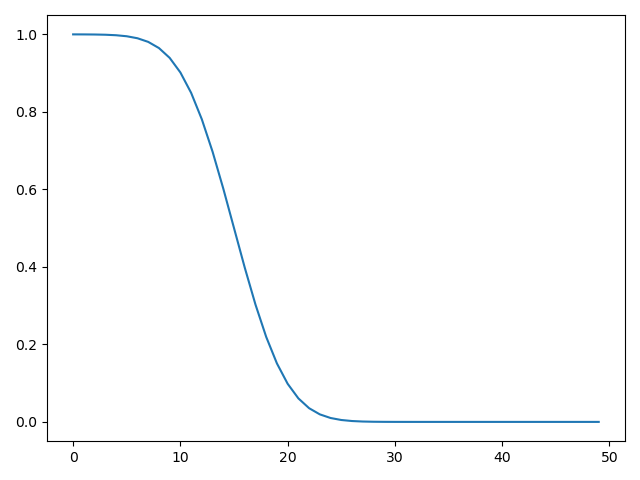

In [28]:
plt.figure()
plt.plot(mound)
plt.tight_layout()

# np.savetxt('Krug.csv',mound)

In [11]:
from tqdm import tqdm

In [ ]:
F = 0.005
t = 350000*3

mound = np.zeros([t,250])

for i in tqdm(range(t)):
    for ind in range(250):
#         plt.plot(theta(xn(ind,t,F))*500,ind,'o',color='orange')
        mound[i,ind] =  theta(xn(ind,i,F))*500

In [30]:
F = 0.005
t = int(150/F)

mound = np.zeros([t,6000])

for ind in range(6000):
    mound[i,ind] =  theta(xn(ind,i,F))

In [13]:
# np.savetxt('/home/jupyteruser/Documents/XZ/Zeno julia/Data/Krug.csv',mound)

In [32]:
# plt.figure()
# plt.plot(mound)

In [18]:
# # @nb.jit(nopython=True)

# def create_profile(layer_lengths_array):
#     # create two points for every layer 
#     xvals = []
#     yvals = []
#     mymaxheight = (layer_lengths_array.shape)[0]
#     for int in range(0,mymaxheight):
#         my_layer_length = layer_lengths_array[int]
#         if(my_layer_length == 0): break
#         xvals = np.append(xvals, [my_layer_length, my_layer_length])
#         yvals = np.append(yvals, [int, int+1])
#     xvals = np.append(xvals, [0])
#     yvals = np.append(yvals, [int])
#     return [xvals, yvals]

In [16]:
# profile_array = np.loadtxt('/home/jupyteruser/Documents/XZ/Zeno julia/Data/10k_5F_lc0_ls1e10.csv')

In [17]:
# F = 0.005 
# t = 30070
# C = 0.5

# plt.figure(figsize=(14,10))
# for ind in range(250):
#     plt.plot([theta(xn(ind,t,F))*500,theta(xn(ind+1,t,F))*500],[ind+1,ind+1],'-',lw=5,color='orange')
#     plt.plot([theta(xn(ind,t,F))*500,theta(xn(ind,t,F))*500],[ind,ind+1],'-',lw=5,color='orange')
# plt.plot([theta(xn(ind,t,F)),0],[ind+1,ind+1],'-',lw=5,color='orange',label='Krug shape 150 layers')
    
# [xvals, yvals] = create_profile(profile_array[-1])
# plt.plot(xvals,yvals+10,'-',lw=5,label='LSF-Zeno 150 layers')   

# plt.xlabel('Length (lattice)',fontsize=40)
# plt.ylabel('Height (layer)',fontsize=40)
# plt.tick_params(labelsize=40)

# plt.legend(loc=1,fontsize=40,frameon=False)

# ax = plt.gca()
# ax.spines['top'].set_linewidth(5)
# ax.spines['bottom'].set_linewidth(5)
# ax.spines['left'].set_linewidth(5)
# ax.spines['right'].set_linewidth(5)
# ax.tick_params(width=5,length=15,direction='out')

# plt.tight_layout()

# # plt.savefig("Zeno_Krug.png",dpi=300)